# Assignment 3: Web Scraping

## Website: books.toscrape.com

#### This is a sample website designed for scraping practices.
#### Website contains data about books stored in 'article' classes.

In [1]:
#!pip install requests beautifulsoup4 pandas

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

/Users/burakkizil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
url = 'http://books.toscrape.com/'
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print('Failed to retrieve the webpage.')
response.encoding = 'utf-8' ## Specifically for £ sign

## Retrieving the data

#### Each book is stored in article class with class name 'product_pod' in the html file
#### Title of each book is within h3 headers
#### Price of each book is given as paragraph with the class name 'price color'
#### Availability of the books is in the text form as In stock or out of stock stored in class name 'instock availability'
#### Ratings are stored as second element of book.p['class'l]

### After retrieving this information, we store them on a list temporarily, then convert to pandas data frame object

In [4]:
soup = BeautifulSoup(html_content, 'html.parser')
books = soup.find_all('article', class_='product_pod')

book_list = []

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    availability = book.find('p', class_='instock availability').text.strip()
    rating = book.p['class'][1]
    
    book_info = {
        'Title': title,
        'Price': price,
        'Availability': availability,
        'Rating': rating
    }
    book_list.append(book_info)

In [5]:
df = pd.DataFrame(book_list)

## Data Preprocessing

#### To convert prices into floats, in the first line we ensure there is no non-ascii characters in the strings, then get rid of the £ sign in the second line below
#### We convert rating strings which are given in text into integers using the following mapping
#### Then we check and ensure there aren't any missing values

In [6]:
df['Price'] = df['Price'].str.encode('ascii', 'ignore').str.decode('ascii')
df['Price'] = df['Price'].str.replace('£', '').astype(float)

In [7]:
rating_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating'] = df['Rating'].map(rating_mapping)

In [8]:
df.isnull().sum()

Title           0
Price           0
Availability    0
Rating          0
dtype: int64

## Now we can save the dataset and display some samples

In [9]:
df.to_csv('books.csv', index=False)

In [10]:
df.head()

,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5


## Below are some additional statistics of the datasets

Total number of books scraped: 20

Average price of books: £38.05

Median price of books: £41.38


Price Statistics:
count    20.000000
mean     38.048500
std      15.135231
min      13.990000
25%      22.637500
50%      41.380000
75%      51.865000
max      57.250000
Name: Price, dtype: float64


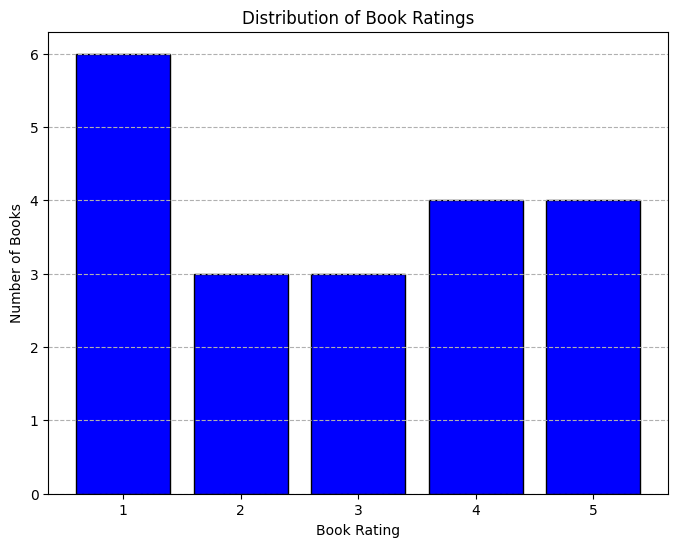

In [11]:
import matplotlib.pyplot as plt
total_books = len(df)
print(f'Total number of books scraped: {total_books}\n')

# Average price
average_price = df['Price'].mean()
print(f'Average price of books: £{average_price:.2f}\n')

# Median price
median_price = df['Price'].median()
print(f'Median price of books: £{median_price:.2f}\n')

# Price statistics
print('\nPrice Statistics:')
print(df['Price'].describe())

# Rating distribution
rating_counts = df['Rating'].value_counts().sort_index()

# Plotting the rating distribution histogram
plt.figure(figsize=(8,6))
plt.bar(rating_counts.index, rating_counts.values, tick_label=rating_counts.index, color='b', edgecolor='black')
plt.xlabel('Book Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Book Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--')
plt.show()
